In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

dpi=400
default_hatch_patterns = ["o" , "x", "." , "*" , "." , "\\" , "O", ".", "*"]
default_color = "0.80"
default_box_width = 14
default_box_marker = "|"
default_box_marker_size = 20
default_box_marker_alpha = 0.8
default_grid_color = "0.8"
df = pd.read_csv("TYU07_corrigido.csv").drop('Unnamed: 0', axis=1)

# Parte 4
Observem os níveis de mensuração das variáveis. Se todas forem qualitativas lembrem-se de registrar frequências absolutas e percentuais. Se uma for quantitativa, NÃO CATEGORIZE a variável, use medidas de síntese em função dos valores das qualitativas. JUSTIFIQUEM as variáveis escolhidas para a análise, JUSTIFIQUEM as respostas (usando tabelas de frequências, gráficos ou quaisquer medidas de síntese necessárias).

## Questão 17
As conclusões da questão 10 valem para os três turnos?

In [111]:
df_17 = df.copy()
df_17["OpiniãoNum"] = df["Opinião"].dropna().apply(lambda x: ["Muito insatisfeito", "Insatisfeito", "Indiferente", "Satisfeito", "Muito satisfeito"].index(x))
df_17_mean = df_17.groupby(["Curso", "Turno"])["OpiniãoNum"].mean().unstack(fill_value=0).reindex(["Mecânica", "Produção", "Química", "Civil", "Computação", "Elétrica"])
df_17_std = df_17.groupby(["Curso", "Turno"])["OpiniãoNum"].std().unstack(fill_value=0).reindex(["Mecânica", "Produção", "Química", "Civil", "Computação", "Elétrica"])
df_17_mean.T

Curso,Mecânica,Produção,Química,Civil,Computação,Elétrica
Turno,,,,,,
Diurno,2.21519,2.470668,2.718824,2.888514,2.954839,3.206612
Integral,0.70122,1.264975,1.565365,1.785714,1.883333,1.687500
Noturno,3.27027,3.510638,3.653756,3.810105,3.840217,3.943609


In [112]:
# Agrupa as opiniões dentro de cada turno de cada curso e conta o número de ocorrências
df_17 = df.groupby(["Turno", "Curso", "Opinião"])["Opinião"].count().unstack(fill_value=0)
# Corrige a ordem das colunas de Muito instatisfeito à Muito satisfeito
df_17 = df_17[["Muito insatisfeito", "Insatisfeito", "Indiferente", "Satisfeito", "Muito satisfeito"]]
# Calcula as porcentagens de opiniões dentro de cada curso
df_17p = df_17.div(0.01*df_17.sum(axis=1), axis=0)
df_17p

Opinião              Muito insatisfeito  Insatisfeito  Indiferente  \
Turno    Curso                                                       
Diurno   Civil                 0.000000      2.027027    24.324324   
         Computação            0.000000      2.903226    20.967742   
         Elétrica              0.000000      2.479339     6.611570   
         Mecânica              0.632911     22.468354    36.392405   
         Produção              0.545703     12.824011    34.515689   
         Química               0.000000      7.529412    28.000000   
Integral Civil                 3.061224     38.775510    36.734694   
         Computação            6.666667     31.666667    31.666667   
         Elétrica              0.000000     43.750000    43.750000   
         Mecânica             45.325203     41.598916    10.907859   
         Produção             17.868020     47.512690    25.380711   
         Química               6.281834     47.028862    31.578947   
Noturno  Civil                 0.000000      0.000000     1.742160   
         Computação            0.000000      0.108696     0.543478   
         Elétrica              0.000000      0.000000     0.225564   
         Mecânica              0.000000      0.000000    13.513514   
         Produção              0.000000      0.303951     6.686930   
         Química               0.000000      0.000000     2.934272   

Opinião              Satisfeito  Muito satisfeito  
Turno    Curso                                     
Diurno   Civil        56.418919         17.229730  
         Computação   53.870968         22.258065  
         Elétrica     58.677686         32.231405  
         Mecânica     35.759494          4.746835  
         Produção     43.246930          8.867667  
         Química      49.529412         14.941176  
Integral Civil        19.387755          2.040816  
         Computação   26.666667          3.333333  
         Elétrica     12.500000          0.000000  
         Mecânica      1.964770          0.203252  
         Produção      8.730964          0.507614  
         Química      14.091681          1.018676  
Noturno  Civil        15.505226         82.752613  
         Computação   14.565217         84.782609  
         Elétrica      5.187970         94.586466  
         Mecânica     45.945946         40.540541  
         Produção     34.650456         58.358663  
         Química      28.755869         68.309859

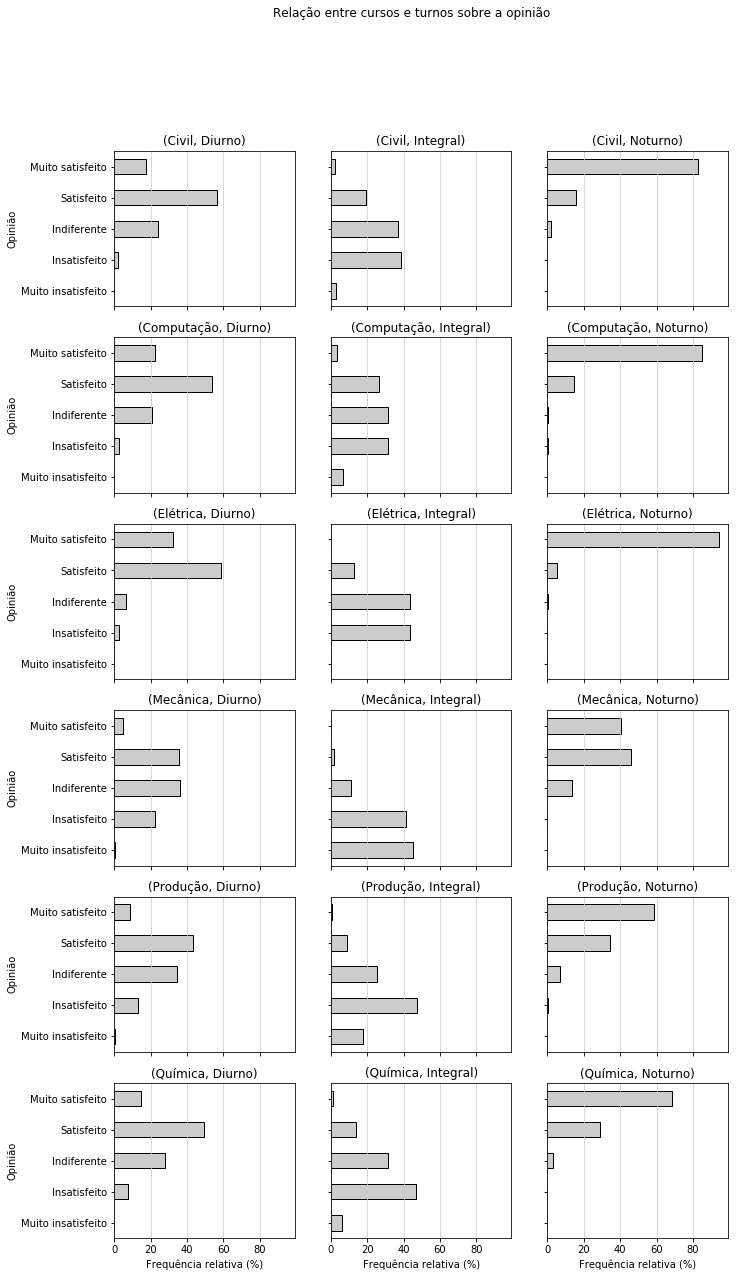

In [21]:
fig, axes = plt.subplots(nrows=6, ncols=3, sharex=True, sharey=True, figsize=(11, 20))
axes = df_17p.T.plot(ax=axes, kind="barh", color=default_color, edgecolor = "black", legend=False, subplots=True, title="Relação entre cursos e turnos sobre a opinião")


for ax in axes:
    ax.set_xlabel("Frequência relativa (%)")
    ax.grid(axis="x", color=default_grid_color)

# Salva figura na pasta dedicada
plt.savefig('Figuras\Q17.png', bbox_inches='tight')

In [127]:
df_17_mean

Turno,Diurno,Integral,Noturno
Curso,,,
Mecânica,2.215190,0.701220,3.270270
Produção,2.470668,1.264975,3.510638
Química,2.718824,1.565365,3.653756
Civil,2.888514,1.785714,3.810105
Computação,2.954839,1.883333,3.840217
Elétrica,3.206612,1.687500,3.943609


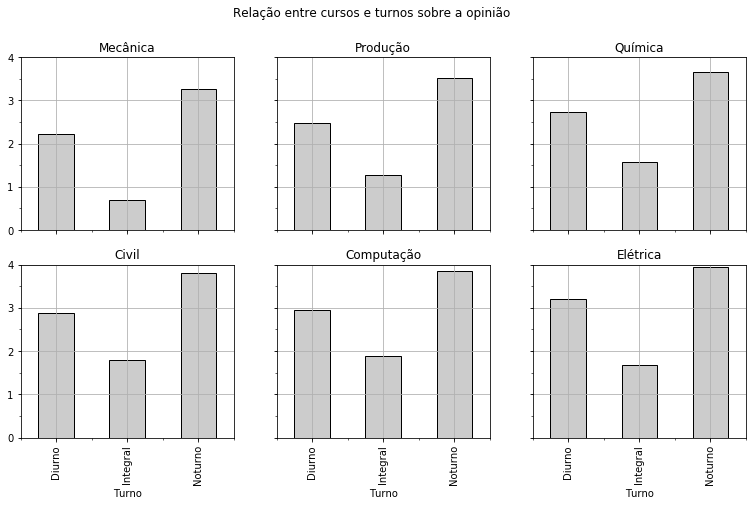

In [136]:
fig, axes = df_17_mean.T.plot(kind='bar', color=default_color, edgecolor = "black", subplots=True, grid=True, 
                            layout=(2,3), legend=False, sharex=True, ylim=(0,4), 
                            yticks=np.arange(0,5,1),
                            sharey=True, figsize=(13,7), title="Relação entre cursos e turnos sobre a opinião")



# Salva figura na pasta dedicada
# plt.savefig('Figuras\Q17.png', bbox_inches='tight', dpi=dpi)

Notou-se sim uma diferença de opiniões dependendo do turno do cada aluno do mesmo curso. Nos cursos de Eng. Civil, Computação, Eng. Elétrica e Eng. Química há muito mais alunos satisfeitos e muito satisfeitos no turno noturno em comparação aos outros turnos. Além disso, em todos os cursos, o turno Integral foi o que obteve a pior classificação pelos alunos.

## Questão 18
As conclusões da questão 14 valem para alunos de todos os cursos?

In [43]:
# Agrupa as renda, mostra o número de opiniões para cada grupo, e corrige a ordem das colunas de Muito instatisfeito à Muito satisfeito
#bins = [1, 1.5, 2.5, 4, 6, 9, 13, 18, 25] #5*math.log10(df["Renda"].count())
bins = [1, 2, 6, 25]
df_18 = df.groupby([pd.cut(df["Renda"], bins), "Curso", "Opinião"])["Opinião"].count().unstack(fill_value=0)[["Muito satisfeito", "Satisfeito", "Indiferente", "Insatisfeito", "Muito insatisfeito"]]
# Calcula as porcentagens de opiniões dentro de cada grupo
df_18p = df_18.div(0.01*df_18.sum(axis=1), axis=0)
df_18p

Opinião             Muito satisfeito  Satisfeito  Indiferente  Insatisfeito  \
Renda   Curso                                                                 
(1, 2]  Civil              58.499414   29.191090    10.199297      2.110199   
        Computação         67.427568   25.724320     5.794557      0.965759   
        Elétrica           87.520799   11.064892     1.081531      0.332779   
        Mecânica            6.359946   22.327470    29.769959     34.370771   
        Produção           18.879056   34.144543    27.802360     17.772861   
        Química            37.176724   36.476293    17.403017      8.674569   
(2, 6]  Civil               7.777778   30.000000    32.222222     26.666667   
        Computação         21.176471   28.235294    27.058824     20.000000   
        Elétrica           37.500000   28.125000    15.625000     18.750000   
        Mecânica            0.095969    1.055662     6.429942     40.211132   
        Produção            0.725689    7.982583    22.206096     46.298984   
        Química             2.955665   16.256158    29.556650     43.842365   
(6, 25] Civil              25.000000    0.000000    25.000000     50.000000   
        Computação         50.000000   25.000000     0.000000     25.000000   
        Elétrica          100.000000    0.000000     0.000000      0.000000   
        Mecânica            0.000000    0.000000     1.204819     10.843373   
        Produção            0.000000   10.000000    10.000000     30.000000   
        Química             0.000000   40.000000    30.000000     10.000000   

Opinião             Muito insatisfeito  
Renda   Curso                           
(1, 2]  Civil                 0.000000  
        Computação            0.087796  
        Elétrica              0.000000  
        Mecânica              7.171854  
        Produção              1.401180  
        Química               0.269397  
(2, 6]  Civil                 3.333333  
        Computação            3.529412  
        Elétrica              0.000000  
        Mecânica             52.207294  
        Produção             22.786647  
        Química               7.389163  
(6, 25] Civil                 0.000000  
        Computação            0.000000  
        Elétrica              0.000000  
        Mecânica             87.951807  
        Produção             50.000000  
        Química              20.000000

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026C931AC1D0>,
      dtype=object)

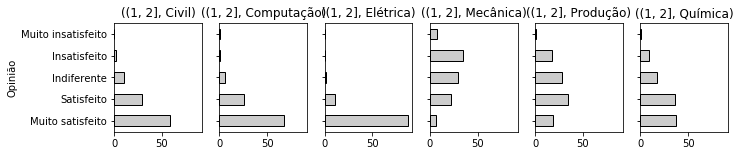

In [110]:
# bins = [1, 2, 6, 25]
# df_14B = df.groupby([pd.cut(df["Renda"], bins), "Opinião"])["Opinião"].count().unstack(fill_value=0)[["Muito insatisfeito", "Insatisfeito", "Indiferente", "Satisfeito", "Muito satisfeito"]]
# # Calcula as porcentagens de opiniões dentro de cada grupo
# df_14Bp = df_14B.div(0.01*df_14B.sum(axis=1), axis=0)

# Imprime 3 gráficos para cada faixa de renda
fig, axes = plt.subplots(nrows=1, ncols=6, sharex=True, sharey=True, figsize=(11, 2))
# df_18p.unstack().unstack().unstack().unstack().plot(ax=axes, kind="barh", legend=False, subplots=True, edgecolor = "black", color=default_color, title="Relação entre faixas de rendas, cursos e opiniões")
# df_18p.T.plot(ax=axes, kind="bar", legend=False, subplots=True, edgecolor = "black", color=default_color, title="Relação entre faixas de rendas, cursos e opiniões")

df_18p.T.iloc[:,0:6].plot(ax=axes, kind="barh", legend=False, subplots=True, edgecolor = "black", color=default_color)
# for ax in axes:
#     axes.set_label("Sa")

# for ax in axes:
#     ax.set_xlabel("Frequência relativa (%)")
#     ax.set_xticks(np.arange(0, 80, 10))
#     ax.set_xticks(np.arange(0, 80, 5), minor=True)
#     ax.grid(axis="x", color=default_grid_color)

# Salva figura na pasta dedicada
# plt.savefig('Figuras\Q18.png', bbox_inches='tight', dpi=dpi)

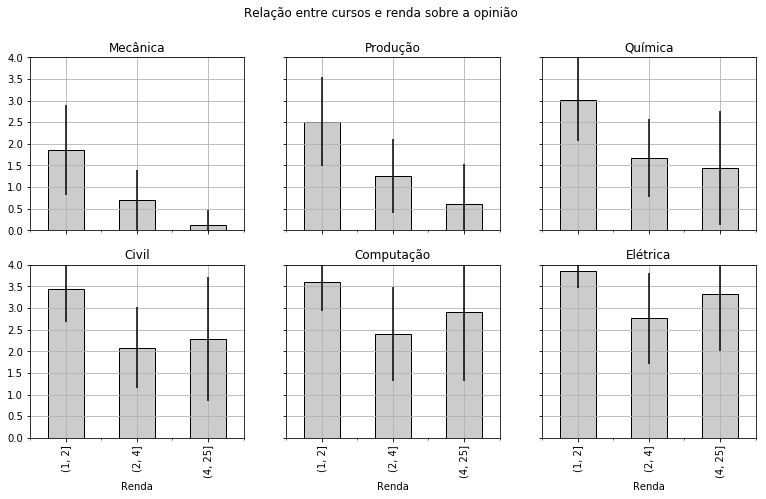

In [9]:
df_18 = df.copy()
df_18["OpiniãoNum"] = df["Opinião"].dropna().apply(lambda x: ["Muito insatisfeito", "Insatisfeito", "Indiferente", "Satisfeito", "Muito satisfeito"].index(x))
df_18_mean = df_18.groupby(["Curso", pd.cut(df["Renda"], [1, 2, 4, 25])])["OpiniãoNum"].mean().unstack(fill_value=0).reindex(["Mecânica", "Produção", "Química", "Civil", "Computação", "Elétrica"])
df_18_std = df_18.groupby(["Curso", pd.cut(df["Renda"], [1, 2, 4, 25])])["OpiniãoNum"].std().unstack(fill_value=0).reindex(["Mecânica", "Produção", "Química", "Civil", "Computação", "Elétrica"])

# axes = df_18_mean.plot(kind='bar', yerr=df_18_std, color=default_color, subplots=True, grid=True, layout=(2,3), legend=False, sharex=True, ylim=(0,4), sharey=True, figsize=(13,7), title="Relação entre cursos e renda sobre a opinião")
df_18_mean.T.plot(kind='bar', yerr=df_18_std.T, color=default_color, subplots=True, grid=True, edgecolor = "black", layout=(2,3), legend=False, sharex=True, ylim=(0,4), sharey=True, figsize=(13,7), title="Relação entre cursos e renda sobre a opinião")


# for i in range(3):
    
#     # Insere linha de média
#     axes[i].axhline(y=df_18_mean.mean()[i], linestyle='-')
# #          ax.axhline(y=df_13fp["Pública"]["Média"], color='black', linestyle='--', label="Média total")
#     print(df_18_mean.mean()[i])
# fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True, figsize=(13, 6))

# for i in range(3):
#     df_18_mean.iloc[:,i].mean().plot(ax=axes[i], yerr=df_18_std, kind="bar", grid=True, ylim = (0,4), color=default_color)
    
# # #     Insere linhas de tendência central
# #     axes[i].axvline(x=df[df["Curso"]==curso]["IAA"].mean(), color='black', linestyle=':')
# #     axes[i].axvline(x=df["IAA"].mean(), color='black', linestyle="-", linewidth=1.5)
#     pass
# df_18_mean.columns


# Salva figura na pasta dedicada
plt.savefig('Figuras\Q18.png', bbox_inches='tight', dpi=dpi)